<a href="https://colab.research.google.com/github/SanjayS2348553/AiML/blob/main/2348553_lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
df=pd.read_csv('/content/Market_Basket_Optimisation.csv')

In [ ]:
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.sample(10)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
2743,shrimp,tomato sauce,spaghetti,soup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1592,cooking oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4410,tomatoes,spaghetti,meatballs,french wine,eggs,melons,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3575,mineral water,chocolate,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3883,green beans,champagne,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3464,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2458,whole wheat rice,chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4786,cake,green tea,strawberries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4230,mineral water,soup,avocado,champagne,gluten free bar,magazines,mayonnaise,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3387,escalope,pasta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

Data Preprocessing

In [ ]:
df=df.fillna(value=0)

In [ ]:
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,low fat yogurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            7500 non-null   object 
 2   avocado            7500 non-null   object 
 3   vegetables mix     7500 non-null   object 
 4   green grapes       7500 non-null   object 
 5   whole weat flour   7500 non-null   object 
 6   yams               7500 non-null   object 
 7   cottage cheese     7500 non-null   object 
 8   energy drink       7500 non-null   object 
 9   tomato juice       7500 non-null   object 
 10  low fat yogurt     7500 non-null   object 
 11  green tea          7500 non-null   object 
 12  honey              7500 non-null   object 
 13  salad              7500 non-null   object 
 14  mineral water      7500 non-null   object 
 15  salmon             7500 non-null   object 
 16  antioxydant juice  7500 

In [ ]:
df.describe()

,olive oil
count,7500.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [ ]:
data=df.drop(columns = ['olive oil'])
data

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach
0,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,low fat yogurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0
7497,chicken,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7498,escalope,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
transactions = []
for i in range(0,data.shape[0]):
    transactions.append([str(data.values[i,j])for j in range(0,data.shape[1])])

In [ ]:
print(transactions)

[['burgers', 'meatballs', 'eggs', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['chutney', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['turkey', 'avocado', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['low fat yogurt', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['whole wheat pasta', 'french fries', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['soup', 'light cream', 'shallot', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['frozen vegetables', 'spaghetti', 'green tea', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['french fries', '0', '0', '0', '0', '0', '0', '0',

In [ ]:
data.shape

(7500, 19)

In [ ]:
transactions = []

for i in range(0, data.shape[0]):
    transaction = [str(data.values[i, j]) for j in range(0, data.shape[1]) if str(data.values[i, j]) != '0']
    transactions.append(transaction)

print(transactions)

[['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra dark chocolate'], ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'], ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'], ['rice', 'sparkling water'], ['spaghetti', 'mineral water', 'ham', 'body spray', 'pancakes', 'green tea'], ['burgers', 'grated chee

In [ ]:
unique_items_set = set()
for transaction in transactions:
    unique_items_set.update(item for item in transaction)
unique_items_list = list(unique_items_set)

In [ ]:
len(unique_items_list)

Converting data into Binary Matrix Format

In [ ]:
binary_matrix = pd.DataFrame(columns=unique_items_list)

# Populate the DataFrame with binary values using pandas.concat
data = []
for transaction in transactions:
    row = [1 if item in transaction else 0 for item in unique_items_list]
    data.append(row)

binary_matrix = pd.concat([binary_matrix, pd.DataFrame(data, columns=unique_items_list)], ignore_index=True)

print(binary_matrix)

     pepper vegetables mix green tea fresh bread hot dogs clothes accessories  \
0         0              0         0           0        0                   0   
1         0              0         0           0        0                   0   
2         0              0         0           0        0                   0   
3         0              0         1           0        0                   0   
4         0              0         0           0        0                   0   
...     ...            ...       ...         ...      ...                 ...   
7495      0              0         0           1        0                   0   
7496      0              0         1           0        0                   0   
7497      0              0         0           0        0                   0   
7498      0              0         1           0        0                   0   
7499      0              0         0           0        0                   0   

     chutney whole weat flo

In [ ]:
top10=binary_matrix.sum().sort_values(ascending=False)[:10]
top10

mineral water        1787
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1229
green tea             990
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
dtype: object

Exploratory data analysis (EDA)

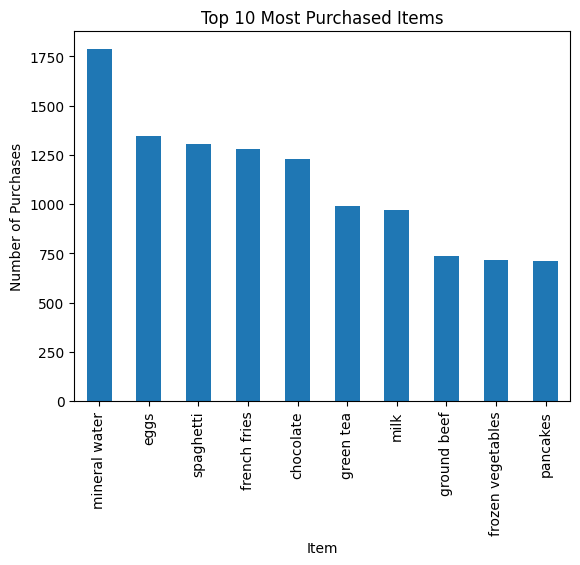

In [ ]:
top10.plot(kind='bar')
plt.xlabel("Item")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Most Purchased Items")
plt.show()

Text(0.5, 1.0, 'Top 10 Most Purchased Items')

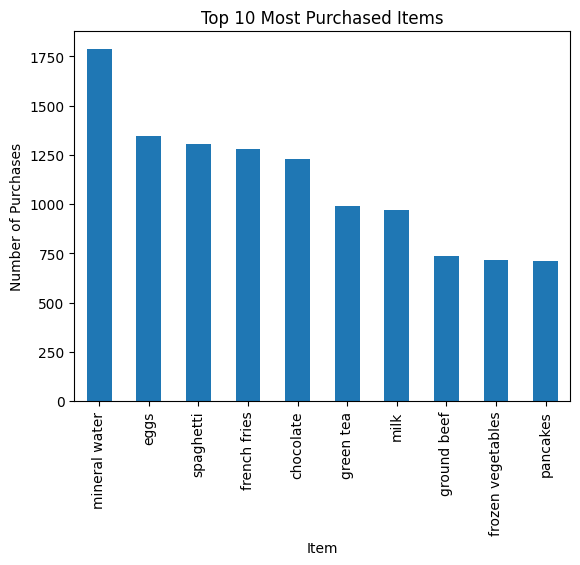

In [ ]:
top10.plot(kind='bar')
plt.xlabel("Item")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Most Purchased Items")


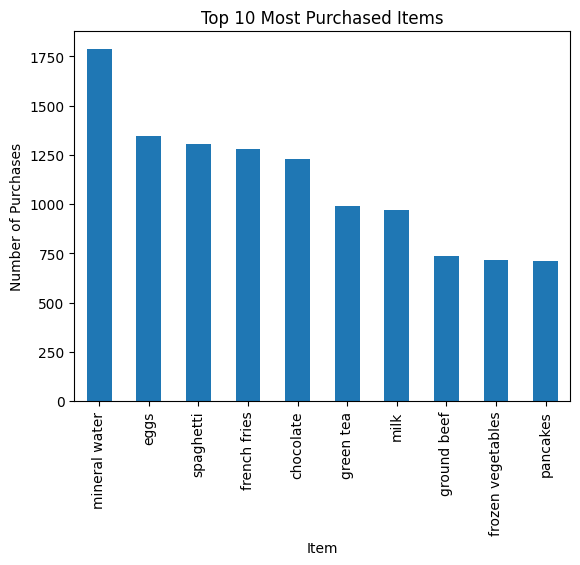

In [ ]:
bottom10.plot(kind='bar')
plt.xlabel("Item")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Most Purchased Items")
plt.show()

Association Rule Mining

In [ ]:
frequent_itemset = apriori(binary_matrix,min_support=0.06,use_colnames=True)
rules = association_rules(frequent_itemset,metric='lift',min_threshold=1)

In [ ]:
basket=pd.DataFrame(binary_matrix)
frequent_itemset = apriori(basket,min_support=0.03,use_colnames=True)
rules = association_rules(frequent_itemset,metric='lift',min_threshold=1)
rules.head()
rules[(rules['confidence']>0.2) & (rules['lift']>1)]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(frozen vegetables),(mineral water),0.095333,0.238267,0.035733,0.374825,1.573133,0.013019,1.218433,0.402718
2,(milk),(mineral water),0.129600,0.238267,0.048000,0.370370,1.554436,0.017121,1.209812,0.409789
3,(mineral water),(milk),0.238267,0.129600,0.048000,0.201455,1.554436,0.017121,1.089982,0.468248
5,(pancakes),(mineral water),0.095067,0.238267,0.033733,0.354839,1.489250,0.011082,1.180687,0.363034
6,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,0.018243,1.159468,0.369806
7,(mineral water),(spaghetti),0.238267,0.174133,0.059733,0.250699,1.439698,0.018243,1.102184,0.400941
8,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,0.013623,1.122506,0.309351
9,(mineral water),(chocolate),0.238267,0.163867,0.052667,0.221041,1.348907,0.013623,1.073398,0.339566
10,(eggs),(mineral water),0.179733,0.238267,0.050933,0.283383,1.189351,0.008109,1.062957,0.194090
11,(mineral water),(eggs),0.238267,0.179733,0.050933,0.213766,1.189351,0.008109,1.043286,0.209004


In [ ]:
worst_choice=rules.sort_values(by='lift',ascending=True)
print('Worst choice to buy items together')
print(worst_choice[['antecedents','consequents','lift']])

Worst choice to buy items together
            antecedents          consequents      lift
31               (eggs)          (chocolate)  1.127246
30          (chocolate)               (eggs)  1.127246
22          (spaghetti)               (eggs)  1.167290
23               (eggs)          (spaghetti)  1.167290
28       (french fries)               (eggs)  1.184803
29               (eggs)       (french fries)  1.184803
11      (mineral water)               (eggs)  1.189351
10               (eggs)      (mineral water)  1.189351
27       (french fries)          (chocolate)  1.228121
26          (chocolate)       (french fries)  1.228121
19               (eggs)               (milk)  1.322261
18               (milk)               (eggs)  1.322261
9       (mineral water)          (chocolate)  1.348907
8           (chocolate)      (mineral water)  1.348907
20          (spaghetti)          (chocolate)  1.373768
21          (chocolate)          (spaghetti)  1.373768
7       (mineral water)       

In [ ]:
best_choice = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])
print('Best choice to buy items together')
print(best_choice[['antecedents', 'consequents', 'confidence','lift']])

Best choice to buy items together
            antecedents          consequents  confidence      lift
12        (ground beef)      (mineral water)    0.416554  1.748266
25        (ground beef)          (spaghetti)    0.398915  2.290857
0   (frozen vegetables)      (mineral water)    0.374825  1.573133
2                (milk)      (mineral water)    0.370370  1.554436
5            (pancakes)      (mineral water)    0.354839  1.489250
6           (spaghetti)      (mineral water)    0.343032  1.439698
8           (chocolate)      (mineral water)    0.321400  1.348907
10               (eggs)      (mineral water)    0.283383  1.189351
14               (milk)          (spaghetti)    0.273663  1.571569
7       (mineral water)          (spaghetti)    0.250699  1.439698
16               (milk)          (chocolate)    0.247942  1.513074
21          (chocolate)          (spaghetti)    0.239219  1.373768
18               (milk)               (eggs)    0.237654  1.322261
24          (spaghetti)     

In [ ]:
top=best_choice.head(10)
print(top)

            antecedents      consequents  antecedent support  \
12        (ground beef)  (mineral water)            0.098267   
25        (ground beef)      (spaghetti)            0.098267   
0   (frozen vegetables)  (mineral water)            0.095333   
2                (milk)  (mineral water)            0.129600   
5            (pancakes)  (mineral water)            0.095067   
6           (spaghetti)  (mineral water)            0.174133   
8           (chocolate)  (mineral water)            0.163867   
10               (eggs)  (mineral water)            0.179733   
14               (milk)      (spaghetti)            0.129600   
7       (mineral water)      (spaghetti)            0.238267   

    consequent support   support  confidence      lift  leverage  conviction  \
12            0.238267  0.040933    0.416554  1.748266  0.017520    1.305576   
25            0.174133  0.039200    0.398915  2.290857  0.022088    1.373959   
0             0.238267  0.035733    0.374825  1.573133 

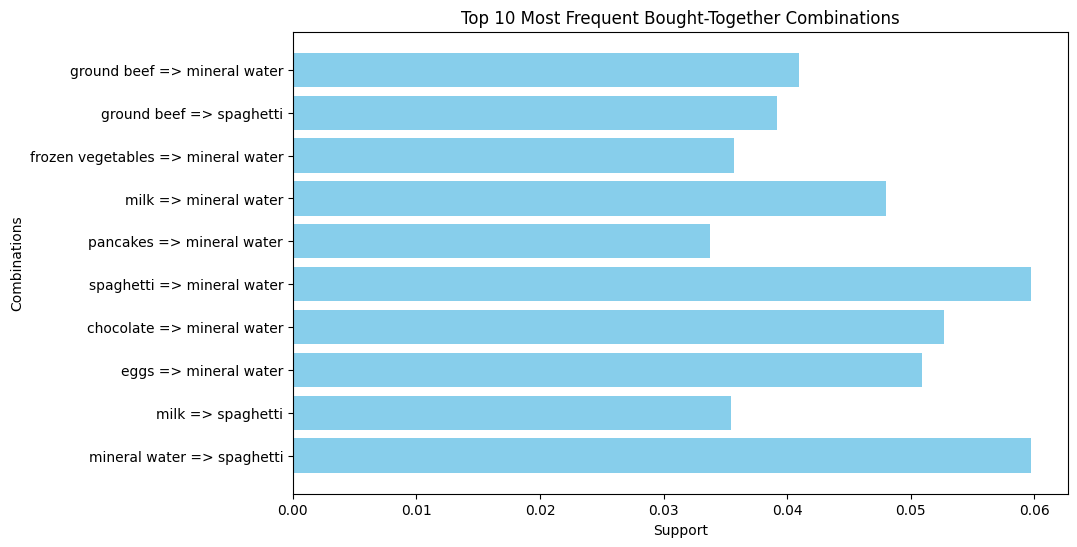

In [ ]:
# Extract antecedents and consequents
antecedents = top['antecedents'].apply(lambda x: ', '.join(list(x)))
consequents = top['consequents'].apply(lambda x: ', '.join(list(x)))

# Combine antecedents and consequents for the bar labels
bar_labels = antecedents + ' => ' + consequents

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(bar_labels, top['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Combinations')
plt.title('Top 10 Most Frequent Bought-Together Combinations')
plt.gca().invert_yaxis()
# Invert y-axis to have the highest support at the top
plt.show()

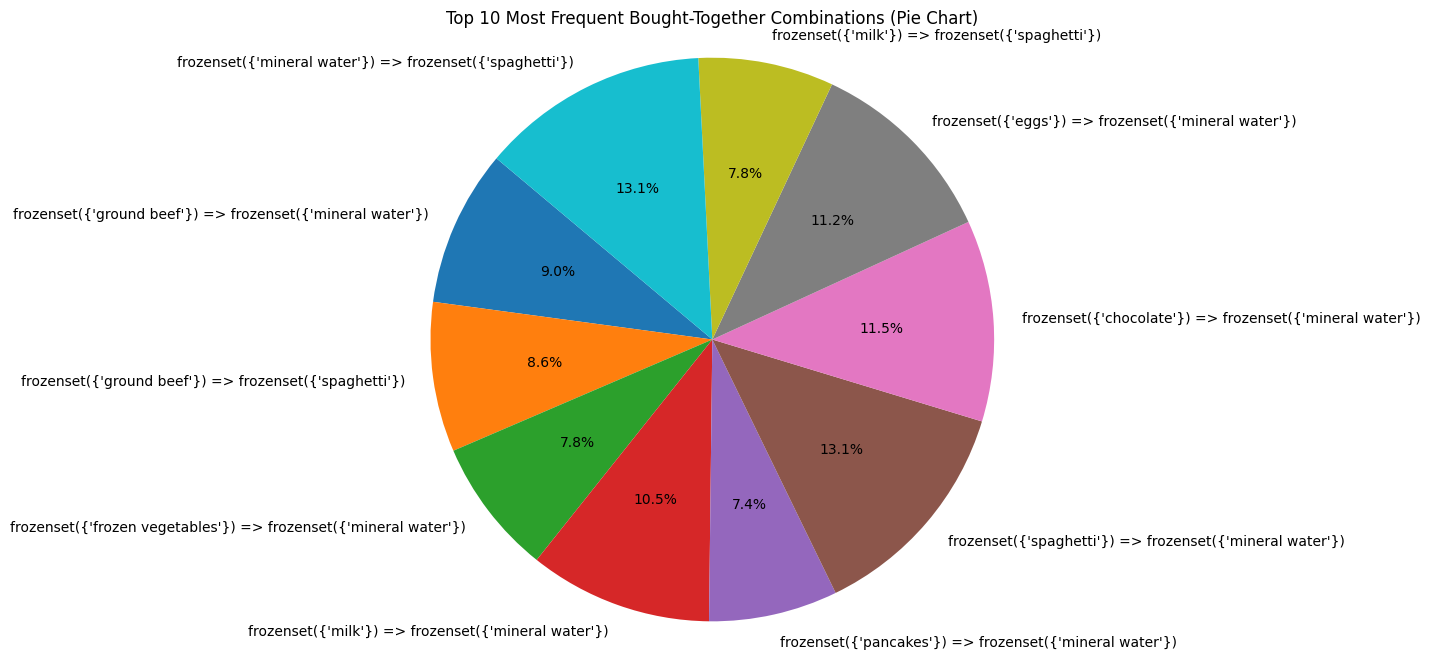

In [ ]:
# Sample data (replace with your actual data)
top10 = best_choice.head(10)
combinations = [' => '.join(map(str, combination)) for combination in zip(top10['antecedents'], top10['consequents'])]
support_values = top10['support']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(support_values, labels=combinations, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Most Frequent Bought-Together Combinations (Pie Chart)')
plt.show()


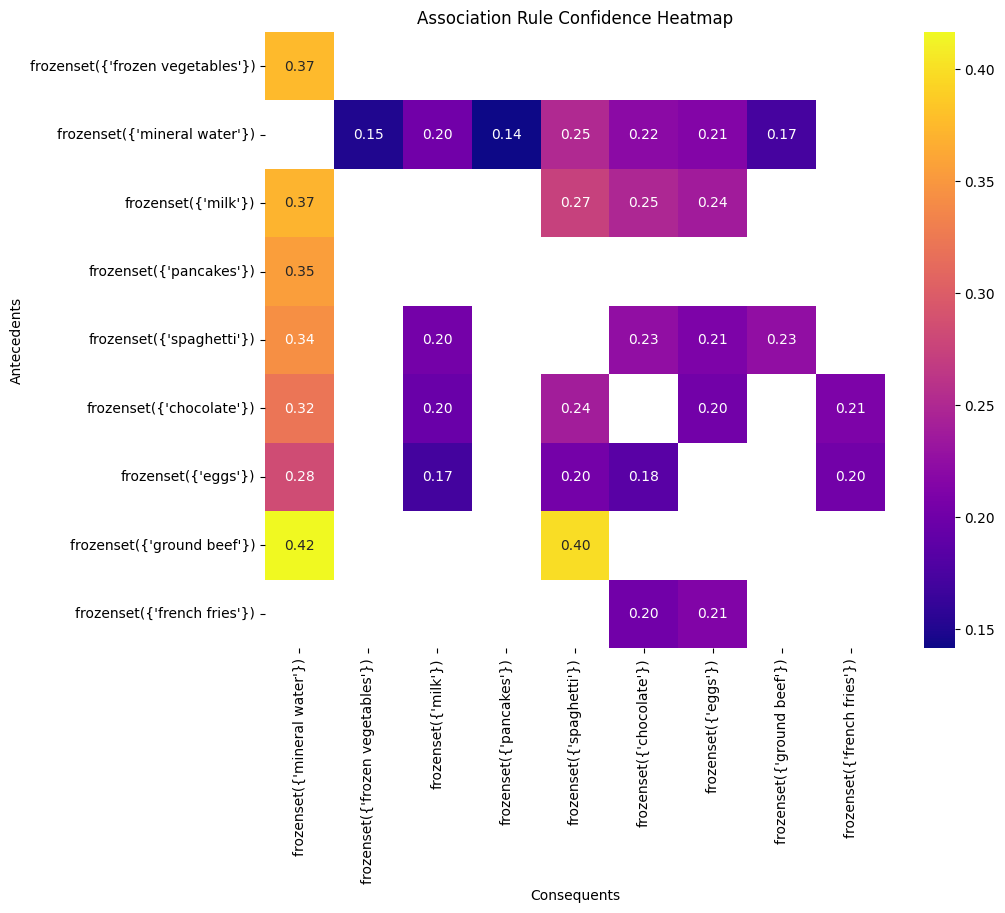

In [ ]:
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values='confidence')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='plasma', fmt='.2f')
plt.title('Association Rule Confidence Heatmap')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')

plt.show()

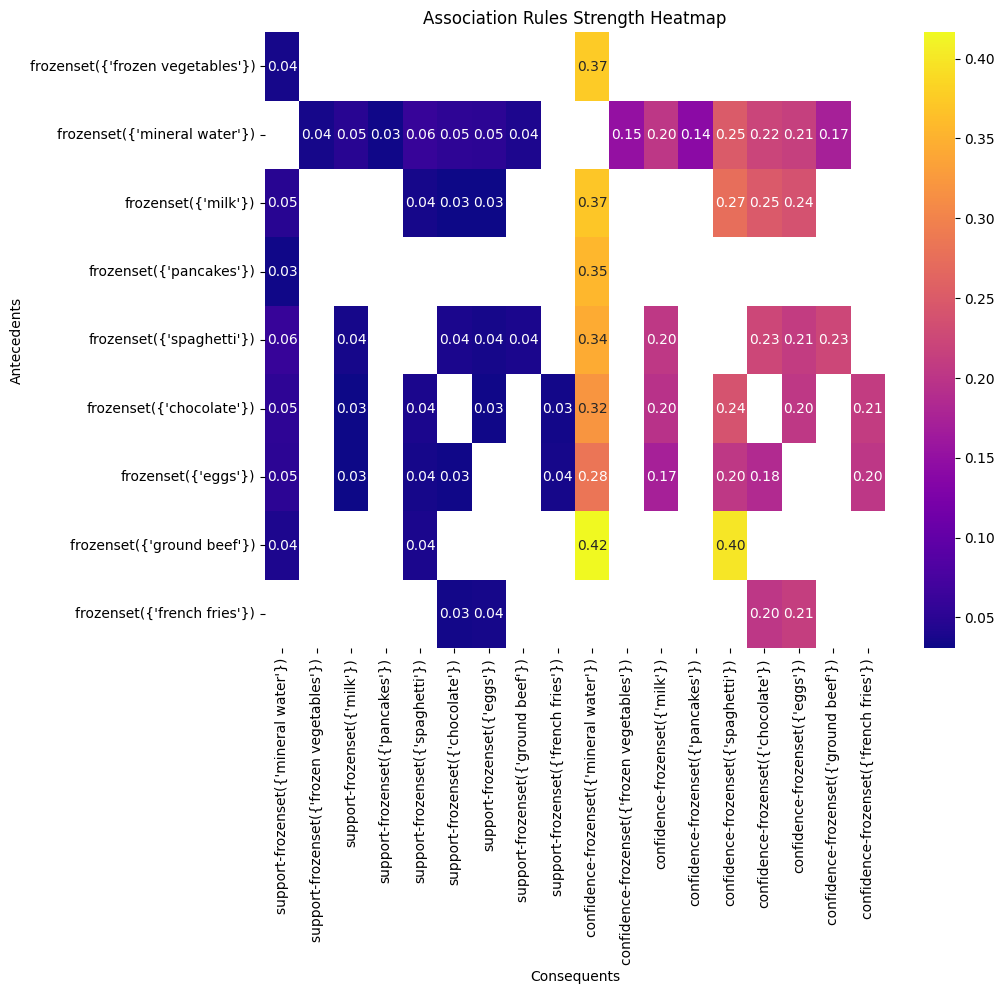

In [ ]:
rules['antecedent support'] = rules['antecedents'].apply(
    lambda x: frequent_itemset[frequent_itemset['itemsets'] == x]['support'].values[0]
)
rules['confidence'] = rules['support'] / rules['antecedent support']

# Prepare data for the heatmap
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values=['support', 'confidence'])

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='plasma', fmt='.2f')

plt.title('Association Rules Strength Heatmap')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')

plt.show()

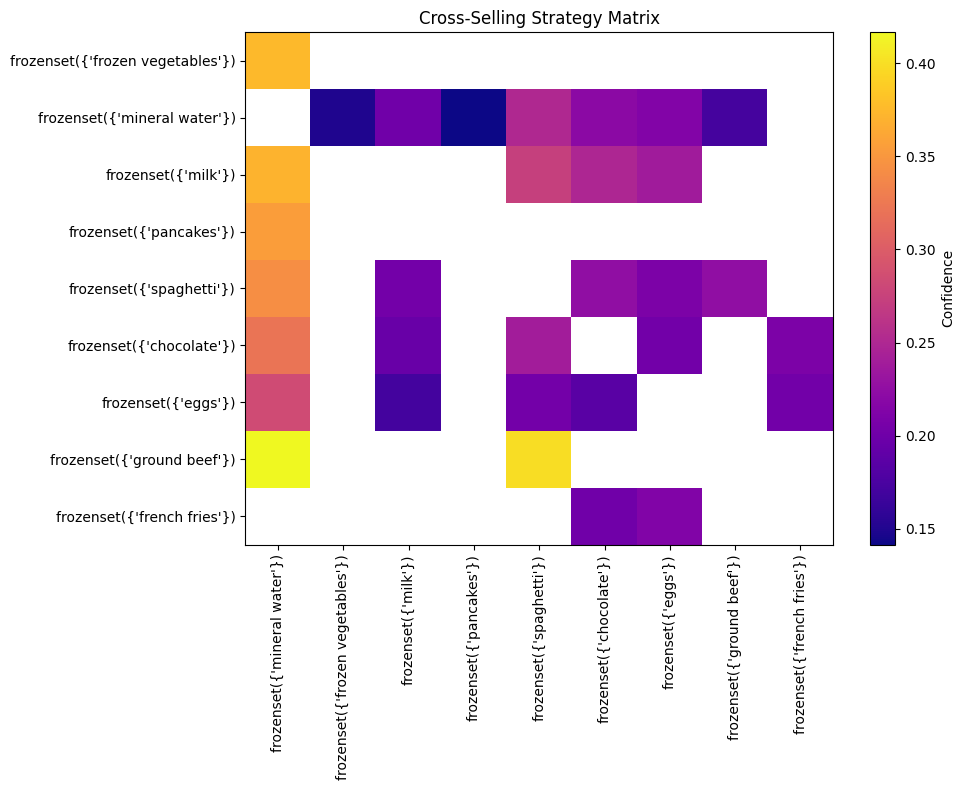

In [ ]:
matrix_df = rules.pivot(index='antecedents', columns='consequents', values='confidence')

# Create the matrix plot
plt.figure(figsize=(10, 8))
plt.imshow(matrix_df, cmap='plasma', aspect='auto')
plt.colorbar(label='Confidence')
plt.xticks(range(len(matrix_df.columns)), matrix_df.columns, rotation=90)
plt.yticks(range(len(matrix_df.index)), matrix_df.index)
plt.title('Cross-Selling Strategy Matrix')
plt.tight_layout()

plt.show()